# Imports e Loads

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

c:\Users\Pedro\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv("data.csv")

# Preview Data

Dicionário de colunas:

gender: 0 (unknown), 1 (male), 2 (female)  
C_api: gender extracted from WikiMedia API, codes as female / male / unknown  
C_man: gender extracted from content coding, coded as 1 (male) / 2 (female) / 3 (unknown)  
E_NEds: I index of stratum IJ (0,1,2,3)  
E_Bpag: J index of stratum IJ (0,1,2,3)  
firstDay: first edition in the Spanish Wikipedia (YYYYMMDDHHMMSS)  
lastDay: last edition in the Spanish Wikipedia (YYYYMMDDHHMMSS)  
NEds: total number of editions  
NDays: number of days (lastDay-firstDay+1)  
NActDays: number of days with editions  
NPages: number of different pages edited  
NPcreated: number of pages created  
pagesWomen: number of edits in pages related to women  
wikiprojWomen: number of edits in WikiProjects related to women  
ns_user: number of edits in namespace user  
ns_wikipedia: number of edits in namespace wikipedia  
ns_talk: number of edits in namespace talk  
ns_userTalk: number of edits in namespace user talk  
ns_content: number of edits in content pages  
weightIJ: correcting weight for stratum IJ  
NIJ: number of elements in stratum IJ

Olhando o info e o Head

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         4746 non-null   int64  
 1   C_api          4746 non-null   object 
 2   C_man          4746 non-null   int64  
 3   E_NEds         4746 non-null   int64  
 4   E_Bpag         4746 non-null   int64  
 5   firstDay       4746 non-null   int64  
 6   lastDay        4746 non-null   int64  
 7   NEds           4746 non-null   int64  
 8   NDays          4746 non-null   int64  
 9   NActDays       4746 non-null   int64  
 10  NPages         4746 non-null   int64  
 11  NPcreated      4746 non-null   int64  
 12  pagesWomen     4746 non-null   int64  
 13  wikiprojWomen  4746 non-null   int64  
 14  ns_user        4746 non-null   int64  
 15  ns_wikipedia   4746 non-null   int64  
 16  ns_talk        4746 non-null   int64  
 17  ns_userTalk    4746 non-null   int64  
 18  ns_conte

In [4]:
df.head()

,gender,C_api,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,...,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1,male,1,2,2,20170527205915,20170721044501,543,56,43,...,4,0,0,91,28,6,76,324,0.915024,978
1,0,unknown,3,3,1,20110301072441,20170731213735,2764,2345,514,...,7,0,0,100,249,183,646,1526,0.661673,477
2,1,male,1,0,2,20060907204302,20140911191722,57,2927,25,...,0,0,0,3,0,1,3,49,0.800528,664
3,1,male,1,1,2,20121003144916,20121208180528,104,67,5,...,2,0,0,20,1,2,2,78,1.027717,841
4,0,unknown,3,1,1,20070311125035,20141106121057,184,2798,27,...,0,0,0,26,10,5,24,112,0.997535,994


## Data Cleaning

Vamos transformar a coluna de firstDay e lastDay de fato em colunas de data

In [5]:
df["firstDay"] = pd.to_datetime(df["firstDay"], format='%Y%m%d%H%M%S')
df["lastDay"] = pd.to_datetime(df["lastDay"], format='%Y%m%d%H%M%S')

E as outras colunas de gênero em colunas categóricas

In [6]:
gender_to_categorical = {
    0: "unknown",
    1: "male",
    2: "female",
}
df["gender"] = df["gender"].replace(gender_to_categorical)

In [7]:
C_man_to_categorical = {
    1: "male",
    2: "female",
    3: "unknown",
}
df["C_man"] = df["C_man"].replace(C_man_to_categorical)

# Check any null values + Check duplicate entries

O dataset tem 0 valores nulos e 0 linhas duplicadas. Os códigos são do artigo do medium.

In [8]:
# generate preview of entries with null values
if df.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()
else:
    print("No null entries found")

No null entries found


In [9]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


# Plots for categorical data

In [10]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")

def categorical_eda(df):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df.select_dtypes(include=['category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=90)
        plt.show()

Temos apenas três colunas categóricas que são as de gênero. 

Uma corresponde ao gênero declarado pelo usuário, outro é o gênero extraído pela API da WikiMedia e a terceira é extraída via content coding.

In [11]:
categorical_eda(df)

To check: Unique count of non-numeric data
Series([], dtype: float64)
Top 5 unique values of gender
    gender  Count
0     male   2792
1  unknown   1601
2   female    353
 
Top 5 unique values of C_api
     C_api  Count
0  unknown   2904
1     male   1661
2   female    181
 
Top 5 unique values of C_man
     C_man  Count
0  unknown   2422
1     male   2029
2   female    295
 


<Axes: xlabel='gender', ylabel='count'>

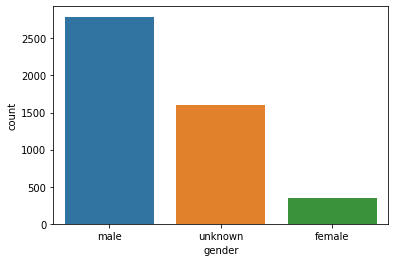

In [12]:
sns.countplot(x=df["gender"])

<Axes: xlabel='C_api', ylabel='count'>

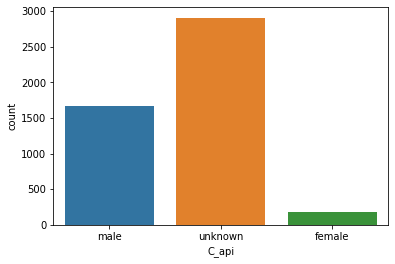

In [13]:
sns.countplot(x=df["C_api"])

<Axes: xlabel='C_man', ylabel='count'>

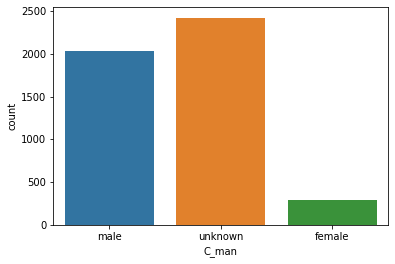

In [14]:
sns.countplot(x=df["C_man"])

Pelo entendimento do grupo com base no artigo associado à base, a coluna mais confiável é a de "gender". Ela será utilizada para futuros modelos preditivos.

# Plots for numerical data

In [15]:
def numeric_eda(df):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
E_NEds,4746.0,1.484197,1.099795,0.000000,1.000000,1.000000,2.000000,3.000000
E_Bpag,4746.0,1.646228,1.079263,0.000000,1.000000,2.000000,3.000000,3.000000
NEds,4746.0,2029.969448,7793.300833,50.000000,95.000000,218.000000,757.750000,153193.000000
NDays,4746.0,2036.607880,1336.119914,1.000000,835.250000,2035.500000,3146.500000,5349.000000
NActDays,4746.0,183.162663,374.034481,1.000000,24.000000,53.000000,154.000000,3843.000000
NPages,4746.0,689.451960,3355.302483,1.000000,29.000000,68.000000,219.750000,94142.000000
NPcreated,4746.0,43.479140,297.395507,0.000000,1.000000,4.000000,14.000000,13394.000000
pagesWomen,4746.0,0.438896,5.327440,0.000000,0.000000,0.000000,0.000000,185.000000
wikiprojWomen,4746.0,0.439949,17.832244,0.000000,0.000000,0.000000,0.000000,949.000000
ns_user,4746.0,74.372946,246.407233,1.000000,4.000000,14.000000,46.000000,6041.000000


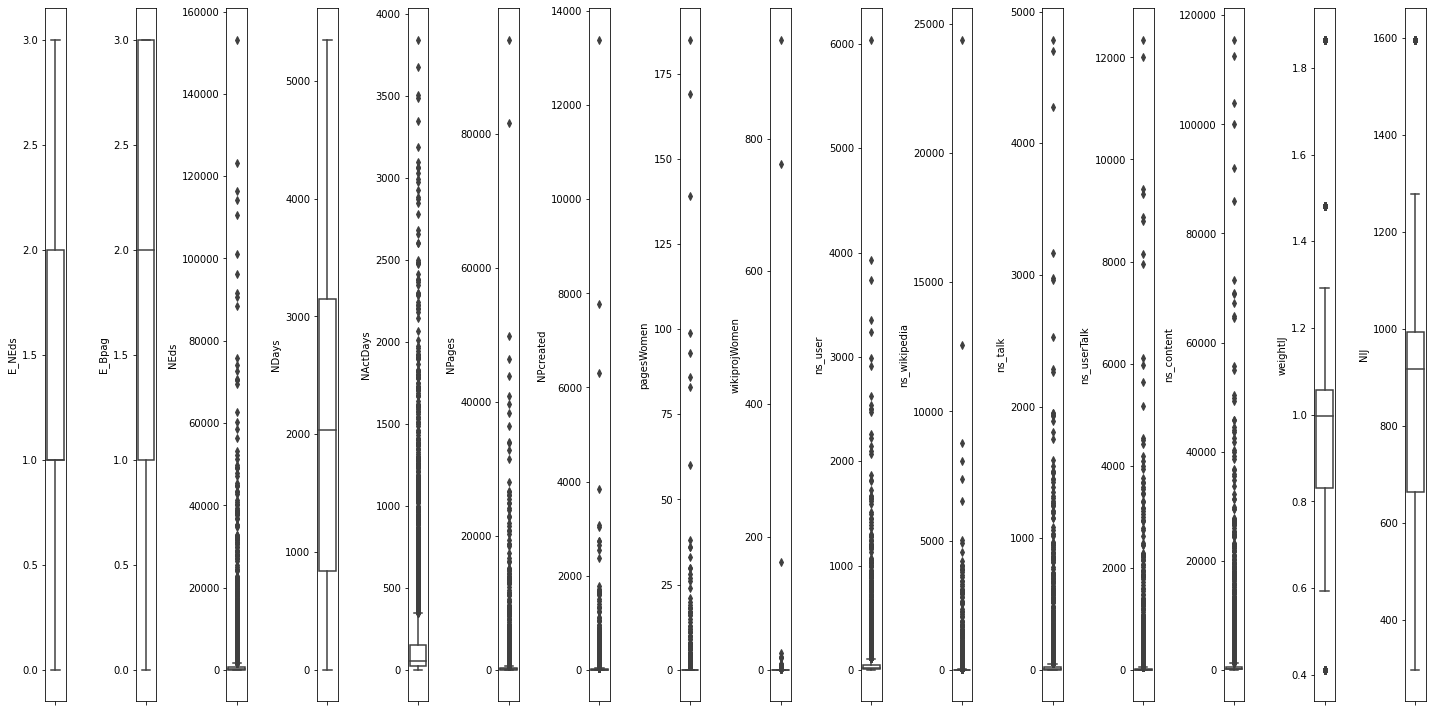

In [16]:
numeric_eda(df)

In [17]:
def numeric_pairjoint_eda(df, hue=None):
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()

c:\Users\Pedro\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


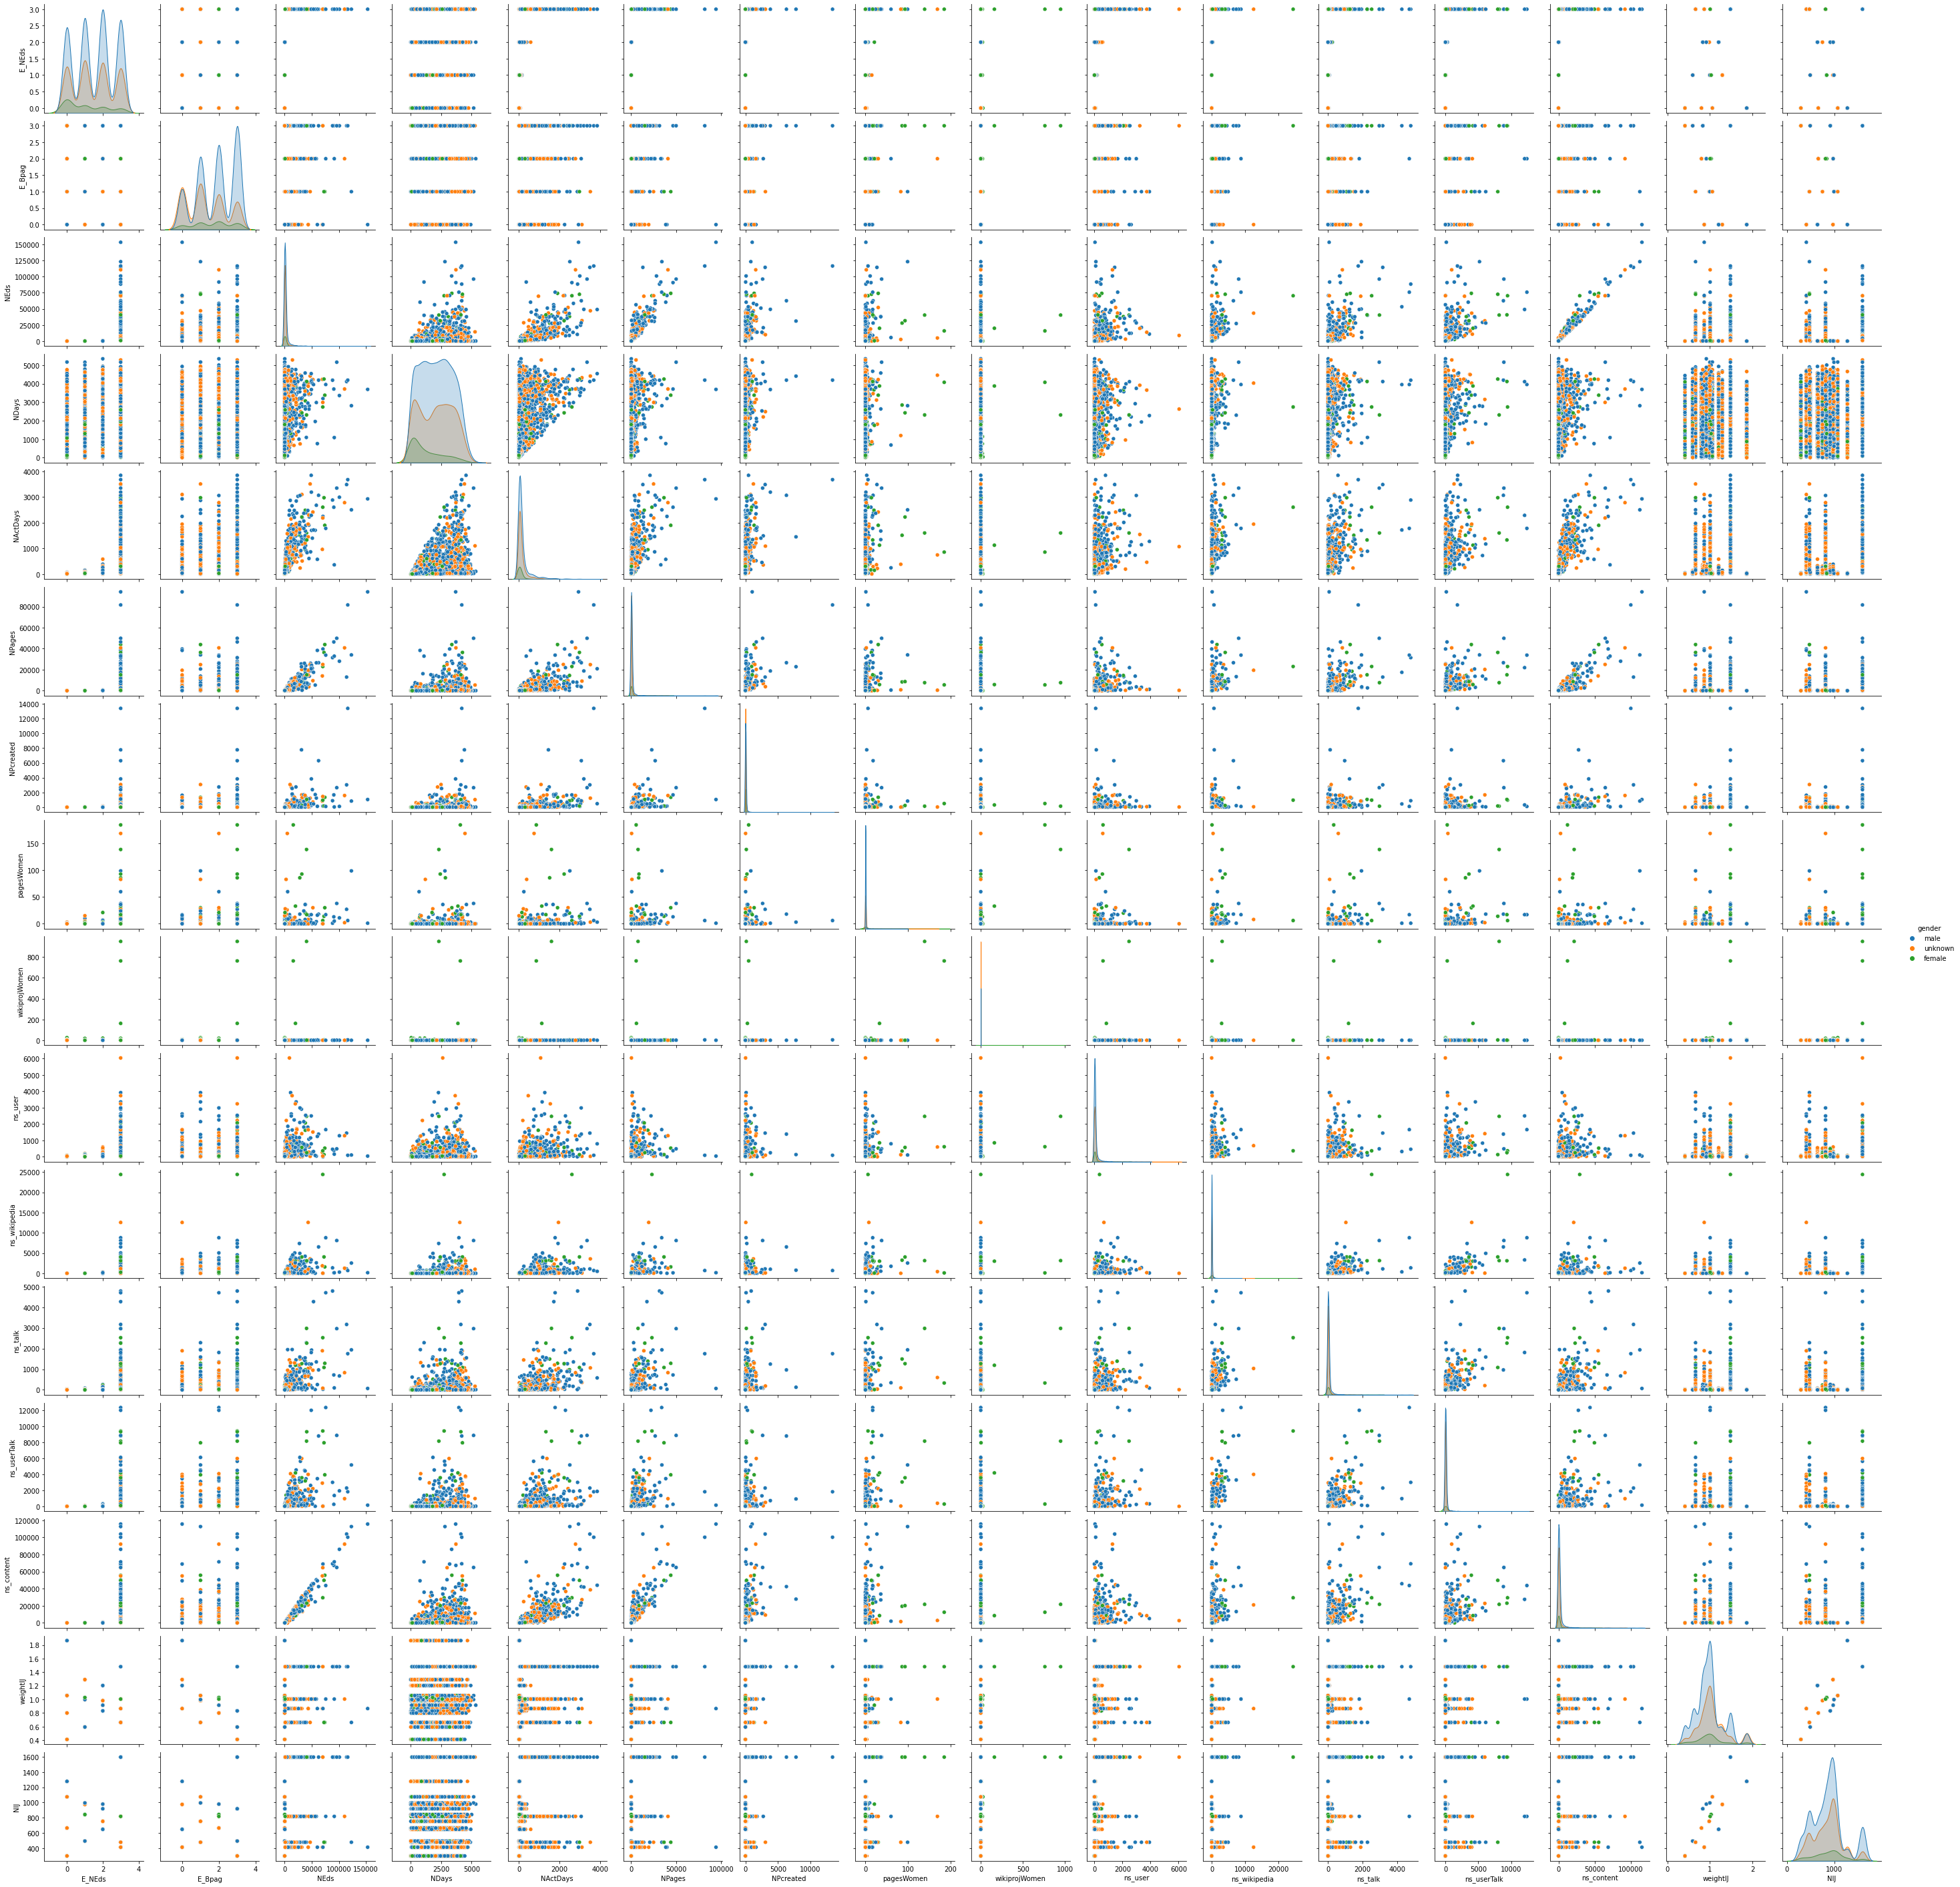

In [18]:
numeric_pairjoint_eda(df, hue="gender")

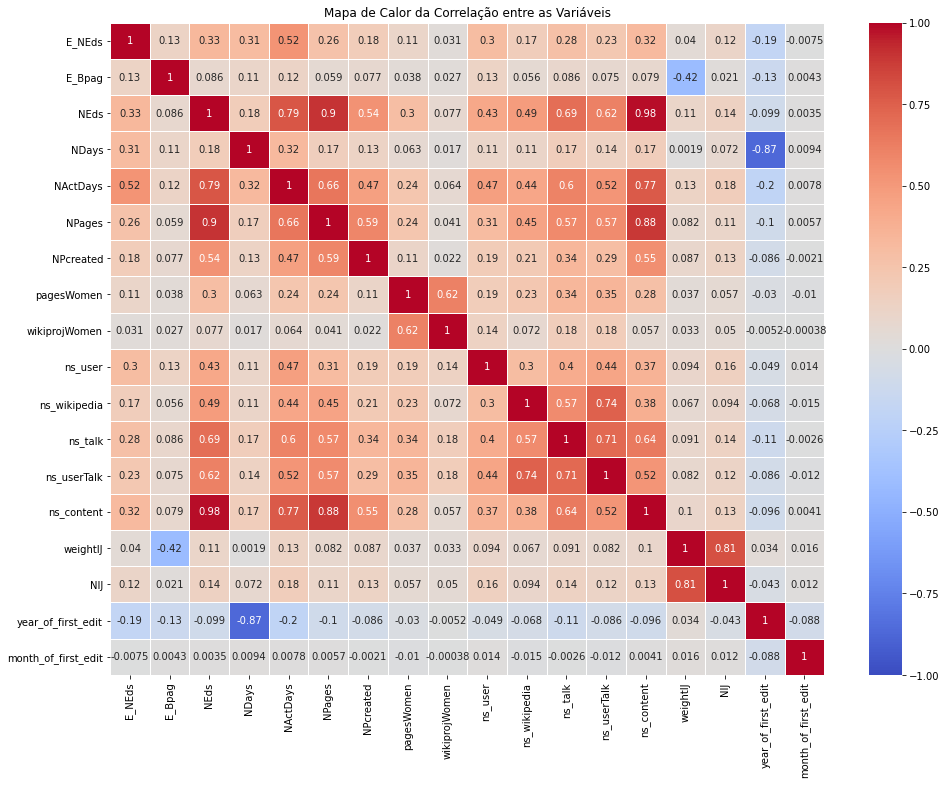

In [47]:
correlation_matrix = df.drop(columns=["gender", "C_api", "C_man"]).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,     # Para mostrar os valores da correlação
            cmap="coolwarm", # Mapa de cores
            vmin=-1, vmax=1, # Estabelecendo os limites para a escala de cores
            linewidths=.5   # Espaço entre os quadrados
           )

plt.title("Mapa de Calor da Correlação entre as Variáveis")
plt.show()

# Datetime columns exploration

Vamos analisar a progressão do ano de primeira edição por gênero ao longo do tempo e, posteriormente, analisar a sazonalidade da primeira postagem por gênero.

In [22]:
df["year_of_first_edit"] = df["firstDay"].apply(lambda x: x.year)
df["month_of_first_edit"] = df["firstDay"].apply(lambda x: x.month)

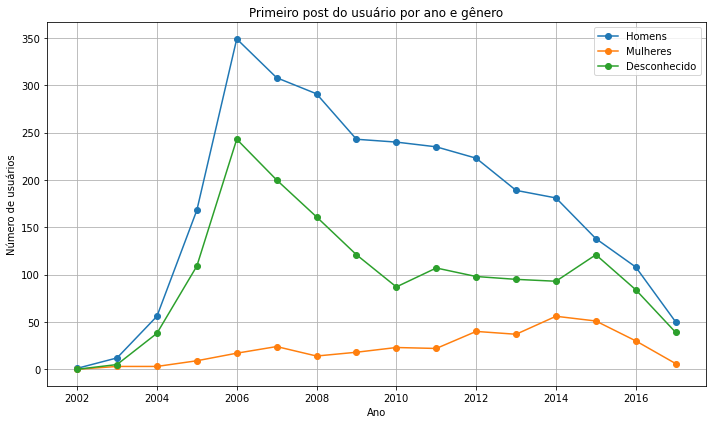

In [39]:
years_of_first_post = list(df["year_of_first_edit"].unique())
years_of_first_post.sort()

anos = []
n_males = []
n_fems = []
n_ukns = []

for year in years_of_first_post:
    filtered = df[df["year_of_first_edit"]==year]

    n_male = len(filtered[filtered["gender"]=="male"])
    n_fem = len(filtered[filtered["gender"]=="female"])
    n_ukn = len(filtered[filtered["gender"]=="unknown"])

    anos.append(year)
    n_males.append(n_male)
    n_fems.append(n_fem)
    n_ukns.append(n_ukn)

plt.figure(figsize=(10,6))

plt.plot(anos, n_males, '-o', label='Homens')
plt.plot(anos, n_fems, '-o', label='Mulheres')
plt.plot(anos, n_ukns, '-o', label='Desconhecido')

plt.title("Primeiro post do usuário por ano e gênero")
plt.xlabel("Ano")
plt.ylabel("Número de usuários")
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

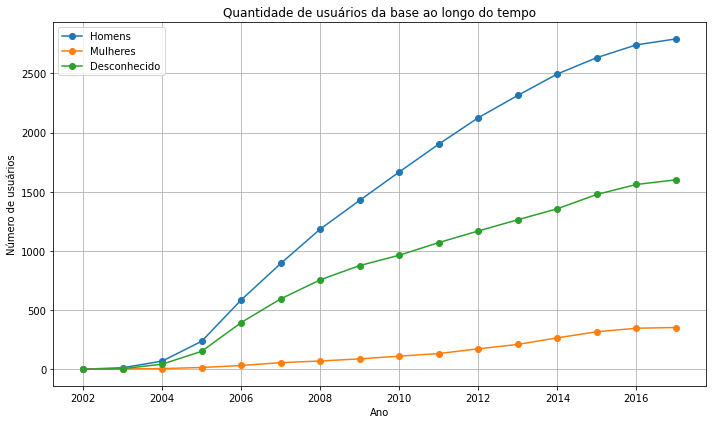

In [40]:
years_of_first_post = list(df["year_of_first_edit"].unique())
years_of_first_post.sort()

anos = []
n_males = []
n_fems = []
n_ukns = []

for year in years_of_first_post:
    filtered = df[df["year_of_first_edit"]==year]

    n_male = len(filtered[filtered["gender"]=="male"])
    n_fem = len(filtered[filtered["gender"]=="female"])
    n_ukn = len(filtered[filtered["gender"]=="unknown"])

    anos.append(year)
    n_males.append(n_male + n_males[-1] if len(n_males)>0 else n_male)
    n_fems.append(n_fem + n_fems[-1] if len(n_fems)>0 else n_fem)
    n_ukns.append(n_ukn + n_ukns[-1] if len(n_ukns)>0 else n_ukn)

plt.figure(figsize=(10,6))

plt.plot(anos, n_males, '-o', label='Homens')
plt.plot(anos, n_fems, '-o', label='Mulheres')
plt.plot(anos, n_ukns, '-o', label='Desconhecido')

plt.title("Quantidade de usuários da base ao longo do tempo")
plt.xlabel("Ano")
plt.ylabel("Número de usuários")
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

Agora, analisando a sazonalidade

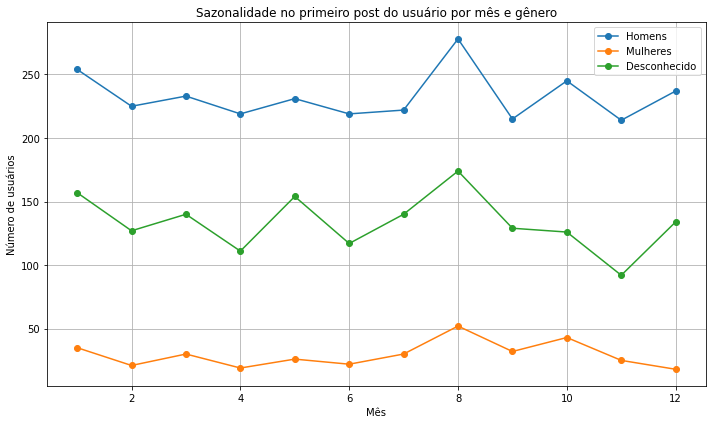

In [42]:
months_of_first_post = list(df["month_of_first_edit"].unique())
months_of_first_post.sort()

meses = []
n_males = []
n_fems = []
n_ukns = []

for month in months_of_first_post:
    filtered = df[df["month_of_first_edit"]==month]

    n_male = len(filtered[filtered["gender"]=="male"])
    n_fem = len(filtered[filtered["gender"]=="female"])
    n_ukn = len(filtered[filtered["gender"]=="unknown"])

    meses.append(month)
    n_males.append(n_male)
    n_fems.append(n_fem)
    n_ukns.append(n_ukn)

plt.figure(figsize=(10,6))

plt.plot(meses, n_males, '-o', label='Homens')
plt.plot(meses, n_fems, '-o', label='Mulheres')
plt.plot(meses, n_ukns, '-o', label='Desconhecido')

plt.title("Sazonalidade no primeiro post do usuário por mês e gênero")
plt.xlabel("Mês")
plt.ylabel("Número de usuários")
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

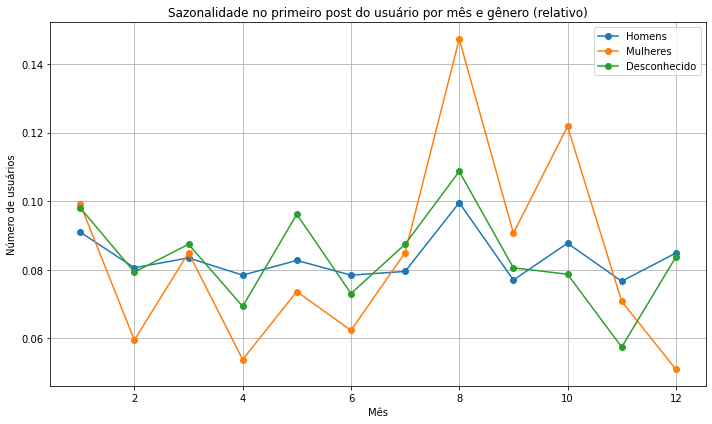

In [44]:
months_of_first_post = list(df["month_of_first_edit"].unique())
months_of_first_post.sort()

meses = []
n_males = []
n_fems = []
n_ukns = []

n_tot_male = len(df[df["gender"]=="male"])
n_tot_fem = len(df[df["gender"]=="female"])
n_tot_ukn = len(df[df["gender"]=="unknown"])

for month in months_of_first_post:
    filtered = df[df["month_of_first_edit"]==month]

    n_male = len(filtered[filtered["gender"]=="male"])
    n_fem = len(filtered[filtered["gender"]=="female"])
    n_ukn = len(filtered[filtered["gender"]=="unknown"])

    meses.append(month)
    n_males.append(n_male/n_tot_male)
    n_fems.append(n_fem/n_tot_fem)
    n_ukns.append(n_ukn/n_tot_ukn)

plt.figure(figsize=(10,6))

plt.plot(meses, n_males, '-o', label='Homens')
plt.plot(meses, n_fems, '-o', label='Mulheres')
plt.plot(meses, n_ukns, '-o', label='Desconhecido')

plt.title("Sazonalidade no primeiro post do usuário por mês e gênero (relativo)")
plt.xlabel("Mês")
plt.ylabel("Número de usuários")
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()